In this notebook,we try to combine 2 different fake.csv and real.csv files. This files consist fake and real news from Zaytung and Hurriyet.

Text files link: https://github.com/sfkcvk/TurkishFakeNewsDataset

In [9]:
import pandas as pd
import numpy as np

In [10]:
data_path = 'Fake.csv'
fake = pd.read_csv(data_path, error_bad_lines=False)

<ipython-input-10-79f5a0513654>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  fake = pd.read_csv(data_path, error_bad_lines=False)


In [11]:
data_path = 'Real.csv'
real = pd.read_csv(data_path, error_bad_lines=False)

<ipython-input-11-ab23af621118>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  real = pd.read_csv(data_path, error_bad_lines=False)


In [12]:
fake.shape

(2162, 1)

In [13]:
real.shape

(2293, 1)

In [14]:
fake.head()

,Body
0,Eczacıbaşı ve AVEA'dan Anlamlı Kampanya Türkiy...
1,"MGK Bildirisinde ""80'ler Partisi"" Tehditine Di..."
2,Facebook Fotoğraf Albümleri Artık Profesyonel ...
3,"RTÜK, Erken Boşalmayla Sonuçlanan Sevişme Sahn..."
4,"Büyükşehir Belediyesi'nden Yeni Hizmet: ""Varoş..."


In [15]:
real.head()

,Body
0,"THY, Lufthansa'yı geri bıraktı TÜRK Hava Yolla..."
1,"Genç kıza laf atıp, erkek arkadaşını döven 6 k..."
2,Aslan- 4 Şubat haftalık burç yorumları Astrol...
3,LeBron'un dönüşü muhteşem oldu! Sakatlığını a...
4,'Yurtdışındaki üniversitelerin sözde şubelerin...


Labelling fake and real dataframe before the concatination in one dataframe

Fake News -> "yalan" or 0

Real News -> "gerçek" or 1

In [16]:
fake["Label"] = "yalan"   
real["Label"] = "gerçek"

In [17]:
news = pd.concat([fake,real])

In [18]:
news.head()

,Body,Label
0,Eczacıbaşı ve AVEA'dan Anlamlı Kampanya Türkiy...,yalan
1,"MGK Bildirisinde ""80'ler Partisi"" Tehditine Di...",yalan
2,Facebook Fotoğraf Albümleri Artık Profesyonel ...,yalan
3,"RTÜK, Erken Boşalmayla Sonuçlanan Sevişme Sahn...",yalan
4,"Büyükşehir Belediyesi'nden Yeni Hizmet: ""Varoş...",yalan


In [19]:
news = news.sample(frac = 1)  #shuffle the dataframe

In [20]:
news.head()

,Body,Label
1213,Mustafa Denizli: Var olan kredimizi tüketiyoru...,gerçek
918,Yemek Kartlarıyla Market Alışverişinin Yasakla...,yalan
1512,Samsun'da feci olay... Bu halde hastaneye kald...,gerçek
1859,Şırnak'ta minibüsün geçişi sırasında patlama: ...,gerçek
2041,İnce hesaplar! Beşiktaş yenerse averajla... Sp...,gerçek


In [21]:
news.shape

(4455, 2)

Fake and Real News Distrubution comprassion using matplot library

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

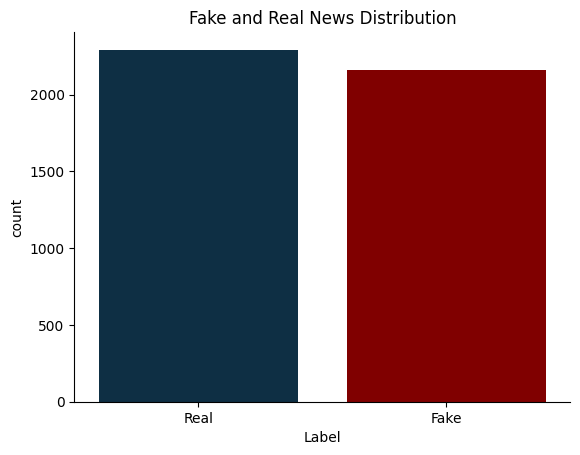

In [23]:
# making a bar plot to count the frequency of 
# fake and real news
sns.countplot(x='Label', 
              data=news,
              palette=['#0e2f44', '#800000'],
              saturation=2)
sns.despine()
plt.xticks([0,1], ['Real', 'Fake'])
plt.title('Fake and Real News Distribution');

This means that we have 2293 Real and 2162 Fake news data

In [24]:
label_counts = news['Label'].value_counts()

label_counts

gerçek    2293
yalan     2162
Name: Label, dtype: int64

Save the dataframe as a .csv file before the preprocessing steps

In [25]:
news.to_csv('news.csv', index=False, encoding='utf-8-sig')